In [1]:
#Importar libreria pandas 
import pandas as pd 

In [2]:
#Cargar el archivo en un data frame 
df_bitcoin=pd.read_csv(r"C:\Users\Usuario\Documents\Proyecto EDA\src\data\coin_Bitcoin.csv") 
#mostrar un head 
print(df_bitcoin.head ())

   SNo     Name Symbol                 Date        High         Low  \
0    1  Bitcoin    BTC  2013-04-29 23:59:59  147.488007  134.000000   
1    2  Bitcoin    BTC  2013-04-30 23:59:59  146.929993  134.050003   
2    3  Bitcoin    BTC  2013-05-01 23:59:59  139.889999  107.720001   
3    4  Bitcoin    BTC  2013-05-02 23:59:59  125.599998   92.281898   
4    5  Bitcoin    BTC  2013-05-03 23:59:59  108.127998   79.099998   

         Open       Close  Volume     Marketcap  
0  134.444000  144.539993     0.0  1.603769e+09  
1  144.000000  139.000000     0.0  1.542813e+09  
2  139.000000  116.989998     0.0  1.298955e+09  
3  116.379997  105.209999     0.0  1.168517e+09  
4  106.250000   97.750000     0.0  1.085995e+09  


In [3]:
# obtener imformacion referente a la cantidad de filas y columnas respectivamente 
df_bitcoin.shape 

(2991, 10)

In [4]:
# observar que tipo de datos tengo y si cuenta con datos nulos, en este caso no cuento con datos de este tipo.
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SNo        2991 non-null   int64  
 1   Name       2991 non-null   object 
 2   Symbol     2991 non-null   object 
 3   Date       2991 non-null   object 
 4   High       2991 non-null   float64
 5   Low        2991 non-null   float64
 6   Open       2991 non-null   float64
 7   Close      2991 non-null   float64
 8   Volume     2991 non-null   float64
 9   Marketcap  2991 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 233.8+ KB


In [5]:
# mostrar de forma estadistica las columnas numericas.
df_bitcoin.describe()

,SNo,High,Low,Open,Close,Volume,Marketcap
count,2991.000000,2991.000000,2991.000000,2991.000000,2991.000000,2.991000e+03,2.991000e+03
mean,1496.000000,6893.326038,6486.009539,6700.146240,6711.290443,1.090633e+10,1.208761e+11
std,863.571653,11642.832456,10869.032130,11288.043736,11298.141921,1.888895e+10,2.109438e+11
min,1.000000,74.561096,65.526001,68.504997,68.431000,0.000000e+00,7.784112e+08
25%,748.500000,436.179001,422.879486,430.445496,430.569489,3.036725e+07,6.305579e+09
50%,1496.000000,2387.610107,2178.500000,2269.889893,2286.409912,9.460360e+08,3.741503e+10
75%,2243.500000,8733.926948,8289.800459,8569.656494,8576.238715,1.592015e+10,1.499957e+11
max,2991.000000,64863.098908,62208.964366,63523.754869,63503.457930,3.509679e+11,1.186364e+12


In [6]:
#importamos las librerias y analisamos la distribucion del precio de Btc 
import matplotlib.pyplot as plt
import seaborn as sns 
import matplotlib.dates as mdates
%pip install mplfinance
import mplfinance as mpf

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Usuario\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


#### GRAFICA 1

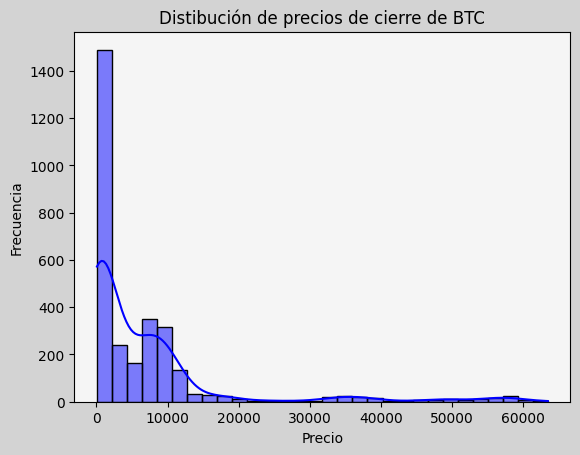

In [7]:
plt.figure(facecolor='lightgray')
sns.histplot (df_bitcoin['Close'], bins=30,kde=True, color='blue')
plt.gca().set_facecolor('whitesmoke')
#sns.kdeplot(df['Close'], color='red')

plt.title("Distibución de precios de cierre de BTC")
plt.xlabel("Precio")
plt.ylabel("Frecuencia")
plt.show()

Teniendo en cuenta la grafica anterior y como se dibuja la cola de la grafica, podemos observar que existe una mayoria de dias en las que el precio se mantiene bajo.

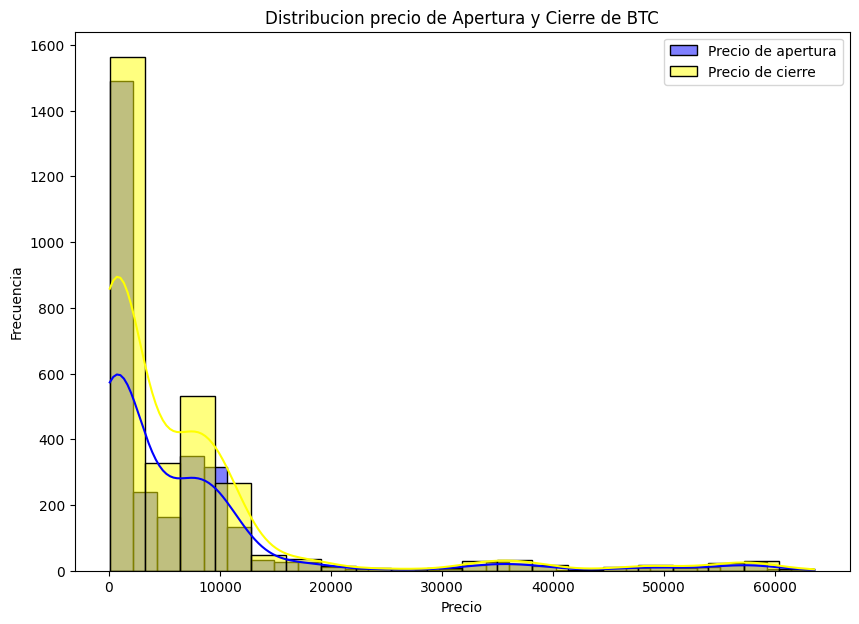

In [8]:
#analizar los precios de apertura y de cierre en cuanto a su distrubucion.
plt.figure(figsize=(10,7))
sns.histplot(df_bitcoin['Open'], bins=30, color='blue',kde=True , label= 'Precio de apertura')
sns.histplot(df_bitcoin['Close'], bins=20, color= 'yellow',kde= True, label='Precio de cierre')
plt.title('Distribucion precio de Apertura y Cierre de BTC')
plt.xlabel('Precio')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

El precio cierra por debajo del precio de apertura generalmente. Lo anterior implica que la ventana para capitalizar es muy corta 


In [9]:
df_bitcoin.head()
#df.set_index("Date",inplace=True)

,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


<Axes: >

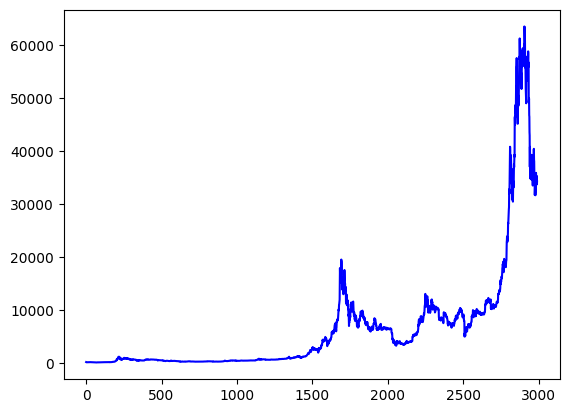

In [10]:
df_bitcoin ['Close'].plot( color= 'blue', label='Precio de cierre')

In [ ]:
df_bitcoin['Date']= pd.to_datetime(df_bitcoin['Date']) # Cambiar la columna 'Date' a  tipo datatime  para cada una de los archivos. 
df_bitcoin.set_index('Date', inplace=True)

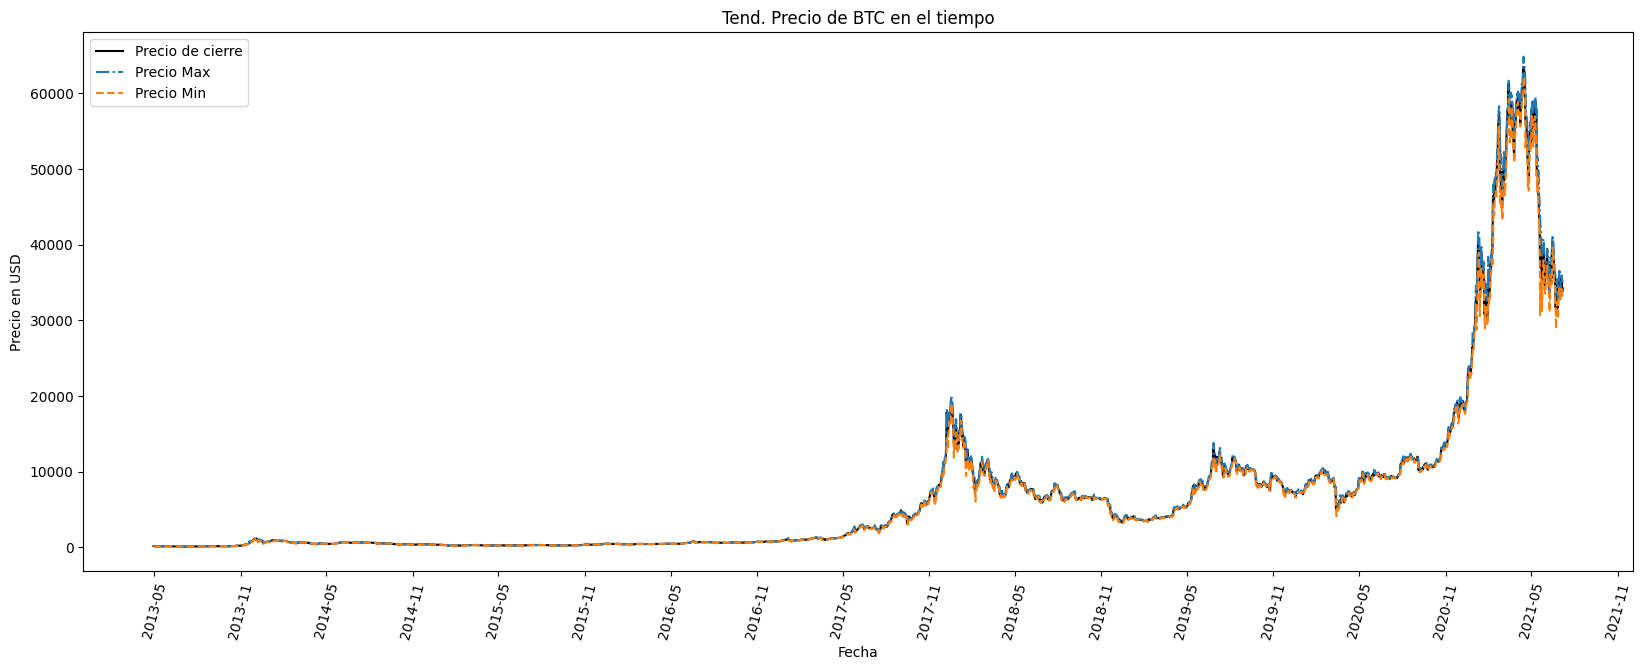

In [23]:
#Tendencia del precio a lo largo del tiempo 
plt.figure(figsize=(20,7))
plt.plot (df_bitcoin.index ,df_bitcoin['Close'], color= 'black', label='Precio de cierre') #cambiar color 
plt.plot(df_bitcoin.index, df_bitcoin['High'], label='Precio Max', linestyle='-.')
plt.plot(df_bitcoin.index, df_bitcoin['Low'], label='Precio Min', linestyle='--')
plt.title('Tend. Precio de BTC en el tiempo')
plt.xlabel('Fecha')
plt.ylabel('Precio en USD')
#plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=6))

plt.xticks(rotation=75)
plt.legend()
plt.show()
# como poner las fechas en X, cambiar paleta de colores
# https://github.com/alexhuang1117/Data-Science-Portfolio/blob/master/Bitcoin_Analysis/Bitcoin%20Analysis.Rmd

In [12]:
# poner la columna 'Date' en el eje X 
df_bitcoin ['Date']= pd.to_datetime(df_bitcoin['Date']) # comprobar que la columna Date esta en formato datetime

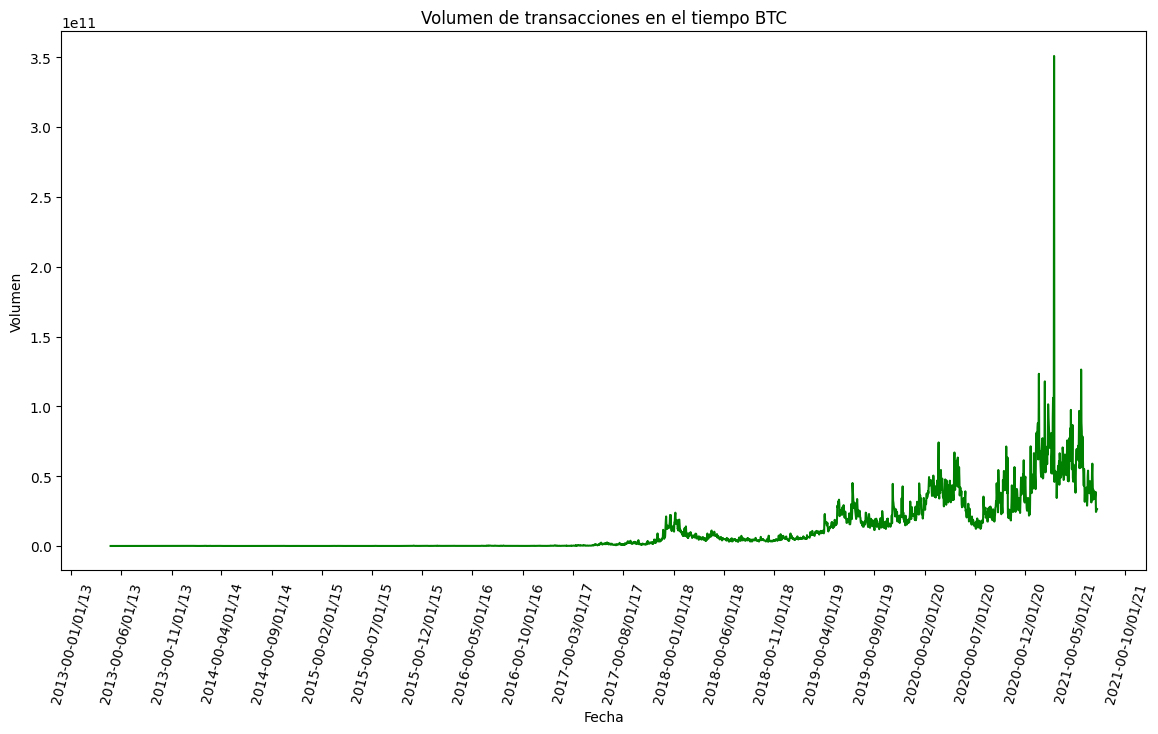

In [14]:
# Analizar el cambio en el volumen de BTC en el tiempo.
plt.figure(figsize=(14,7))
plt.plot(df_bitcoin['Date'], df_bitcoin['Volume'], color='green')
plt.title('Volumen de transacciones en el tiempo BTC')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%M-%D'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=5))
plt.xticks(rotation=75)
plt.show()

In [95]:
# Mismo grafico anterior pero en vela
'''
df ['Date']= pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
plt.plot(df['Date'], df['Volume'], color='Red')
df['Date']=pd.to_datetime(df['Date'])
df.set_index('Date', inplace= True)
plt.show()
mpf.plot(df,type='candle', style='charles',
        title= 'Tendencia del precio de BTC en el tiempo',
        ylabel= ' Precio USD',
        volume=True,
        figsize=(20,7) )

'''



# Asegúrate de que 'Date' esté en formato datetime, pero no la configures como índice
#df['Date'] = pd.to_datetime(df['Date'])
df_bitcoin.set_index('Date', inplace=True) 
# Graficar volumen usando plt.plot
plt.figure(figsize=(10, 5))
plt.plot(df_bitcoin['Date'], df_bitcoin['Volume'], color='red')
plt.xlabel('Fecha')
plt.ylabel('Volumen')
plt.title('Volumen de transacciones de BTC en el tiempo')
plt.show()

# Configurar 'Date' como índice temporalmente solo para mplfinance
df_mpf = df_bitcoin.set_index('Date')

# Graficar velas con mplfinance
mpf.plot(df_mpf, type='candle', style='charles',
         title='Tendencia del precio de BTC en el tiempo',
         ylabel='Precio USD',
         volume=True,
         figsize=(20, 7))



KeyError: "None of ['Date'] are in the columns"

In [87]:
df_bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2991 entries, 0 to 2990
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      2991 non-null   int64         
 1   SNo        2991 non-null   int64         
 2   Name       2991 non-null   object        
 3   Symbol     2991 non-null   object        
 4   Date       2991 non-null   datetime64[ns]
 5   High       2991 non-null   float64       
 6   Low        2991 non-null   float64       
 7   Open       2991 non-null   float64       
 8   Close      2991 non-null   float64       
 9   Volume     2991 non-null   float64       
 10  Marketcap  2991 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(2), object(2)
memory usage: 257.2+ KB


In [83]:
#df.set_index('Date', inplace=True) 
print (df_bitcoin. columns)

Index(['SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open', 'Close',
       'Volume', 'Marketcap'],
      dtype='object')


In [84]:
df_bitcoin.reset_index(inplace=True)

In [85]:
print(df_bitcoin.columns)

Index(['index', 'SNo', 'Name', 'Symbol', 'Date', 'High', 'Low', 'Open',
       'Close', 'Volume', 'Marketcap'],
      dtype='object')


In [88]:
df_bitcoin.head()

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


In [90]:
df_bitcoin ['Date']= pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace=True)
plt.plot(df_bitcoin['Date'], df_bitcoin['Volume'], color='Red')
df_bitcoin['Date']=pd.to_datetime(df_bitcoin['Date'])
df_bitcoin.set_index('Date', inplace= True)
plt.show()
mpf.plot(df_bitcoin,type='candle', style='charles',
        title= 'Tendencia del precio de BTC en el tiempo',
        ylabel= ' Precio USD',
        volume=True,
        figsize=(20,7) )

KeyError: 'Date'

In [ ]:
df.head()

,index,SNo,Name,Symbol,Date,High,Low,Open,Close,Volume,Marketcap
0,0,1,Bitcoin,BTC,2013-04-29 23:59:59,147.488007,134.000000,134.444000,144.539993,0.0,1.603769e+09
1,1,2,Bitcoin,BTC,2013-04-30 23:59:59,146.929993,134.050003,144.000000,139.000000,0.0,1.542813e+09
2,2,3,Bitcoin,BTC,2013-05-01 23:59:59,139.889999,107.720001,139.000000,116.989998,0.0,1.298955e+09
3,3,4,Bitcoin,BTC,2013-05-02 23:59:59,125.599998,92.281898,116.379997,105.209999,0.0,1.168517e+09
4,4,5,Bitcoin,BTC,2013-05-03 23:59:59,108.127998,79.099998,106.250000,97.750000,0.0,1.085995e+09


c:\Users\Usuario\AppData\Local\Programs\Python\Python39\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


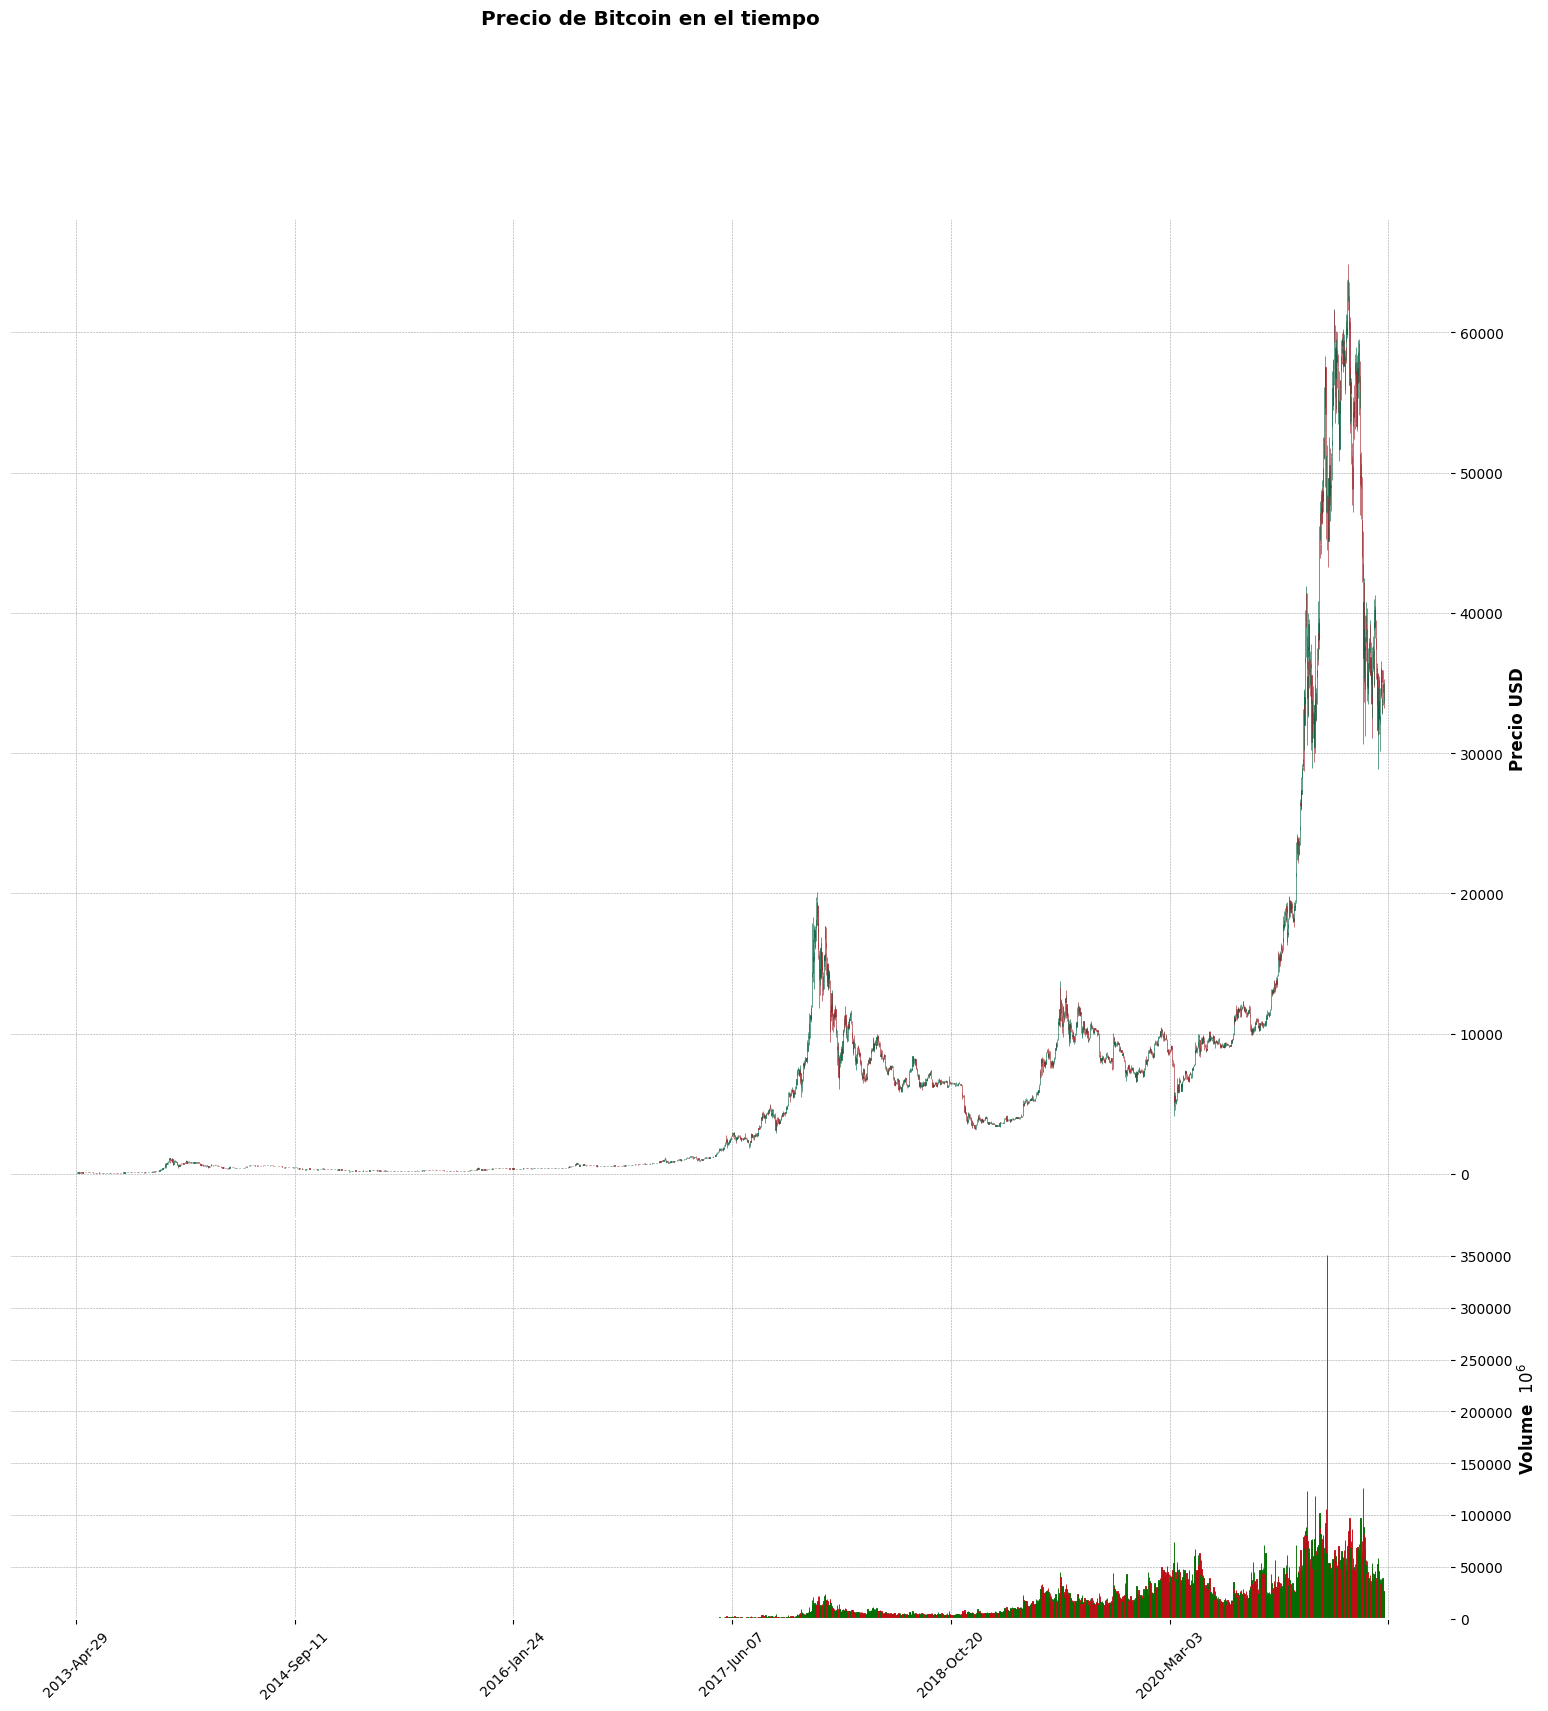

In [92]:
mpf.plot(df_bitcoin, type='candle', style='charles',
         title='Precio de Bitcoin en el tiempo',
         ylabel='Precio USD',
         volume=True,  # Mostrar volumen si se desea
         figsize=(20, 20))

In [93]:
df_mensual = df_bitcoin.resample('M').agg({
    'Open': 'first',       # Primer valor del mes.
    'High': 'max',         # Máximo valor del mes.
    'Low': 'min',          # Mínimo valor del mes.
    'Close': 'last',       # Último valor del mes.
    'Volume': 'sum',       # Suma del volumen para el mes.
    'Marketcap': 'last'    # Último valor de la capitalización.
})

C:\Users\Usuario\AppData\Local\Temp\ipykernel_16112\2951590291.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_mensual = df_bitcoin.resample('M').agg({


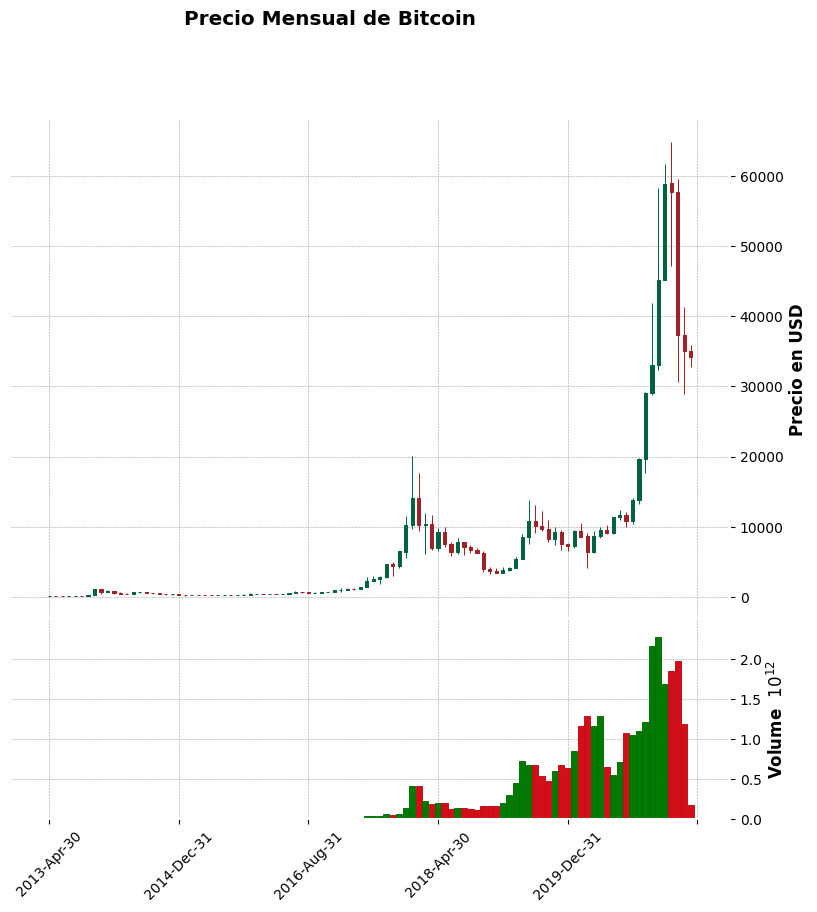

In [94]:
mpf.plot(df_mensual, type='candle', style='charles',
         title='Precio Mensual de Bitcoin',
         ylabel='Precio en USD',
         volume=True,
         figsize=(10, 10))
